In [ ]:
import urllib.request
import numpy as np
import pandas as pd
import sqlite3

#Database connection

In [ ]:
url = 'https://github.com/CNielsen94/Exercises_AAUBSDS/blob/main/MLOps_assignments/Assignment_three/Database/HR_DB.db?raw=true' 
filename = 'HR_DB.db' 
urllib.request.urlretrieve(url, filename)

('HR_DB.db', <http.client.HTTPMessage at 0x7f01132ace20>)

In [ ]:
conn = sqlite3.connect('/content/HR_DB.db')

In [ ]:
#cursor = conn.cursor()

In [ ]:
#cursor.execute('SELECT * FROM EmployeeTiers')

In [ ]:
#results = cursor.fetchall()

In [ ]:
query = 'SELECT * FROM EmployeeTiers'
employee_tiers = pd.read_sql(query, conn)


In [ ]:
query = 'SELECT * FROM manager_survey'
manager_survey = pd.read_sql(query, conn)

In [ ]:
query = 'SELECT * FROM employee_survey'
employee_survey = pd.read_sql(query, conn)

In [ ]:
query = 'SELECT * FROM general'
df_general = pd.read_sql(query, conn)

#Setting up dataframe for EDA

In [ ]:
# Merging dataframe manager_survey to df_general based on 'EmployeeID'
df_general = df_general.merge(manager_survey[['EmployeeID', 'JobInvolvement', 'PerformanceRating','total_mn']], on='EmployeeID')
df_EDA = df_general.merge(manager_survey[['EmployeeID', 'JobInvolvement', 'PerformanceRating','total_mn']], on='EmployeeID')
# Merging dataframe employee_survey to df_general based on 'EmployeeID'
df_general = df_general.merge(employee_survey[['EmployeeID', 'EnvironmentSatisfaction', 'JobSatisfaction','WorkLifeBalance','total_em']], on='EmployeeID')
df_EDA = df_general.merge(manager_survey[['EmployeeID', 'JobInvolvement', 'PerformanceRating','total_mn']], on='EmployeeID')
# Dropping rows containing NaN-values
df_EDA.dropna(axis=0,inplace=True)
df_general.dropna(axis=0,inplace=True)
#df_general.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4382 entries, 0 to 4381
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4382 non-null   int64  
 1   Attrition                4382 non-null   object 
 2   BusinessTravel           4382 non-null   object 
 3   Department               4382 non-null   object 
 4   DistanceFromHome         4382 non-null   int64  
 5   Education                4382 non-null   int64  
 6   EducationField           4382 non-null   object 
 7   EmployeeCount            4382 non-null   int64  
 8   EmployeeID               4382 non-null   int64  
 9   Gender                   4382 non-null   object 
 10  JobLevel                 4382 non-null   int64  
 11  JobRole                  4382 non-null   object 
 12  MaritalStatus            4382 non-null   object 
 13  MonthlyIncome            4382 non-null   int64  
 14  NumCompaniesWorked      

#EDA

In [ ]:
df_EDA_u30 = df_EDA[df_EDA['Age']<30]

In [ ]:
df_EDA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4382 entries, 0 to 4408
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4382 non-null   int64  
 1   Attrition                4382 non-null   object 
 2   BusinessTravel           4382 non-null   object 
 3   Department               4382 non-null   object 
 4   DistanceFromHome         4382 non-null   int64  
 5   Education                4382 non-null   int64  
 6   EducationField           4382 non-null   object 
 7   EmployeeCount            4382 non-null   int64  
 8   EmployeeID               4382 non-null   int64  
 9   Gender                   4382 non-null   object 
 10  JobLevel                 4382 non-null   int64  
 11  JobRole                  4382 non-null   object 
 12  MaritalStatus            4382 non-null   object 
 13  MonthlyIncome            4382 non-null   int64  
 14  NumCompaniesWorked      

In [ ]:
df_left = df_EDA[df_EDA['Attrition']== 'Yes']
df_left.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,JobInvolvement_x,PerformanceRating_x,total_mn_x,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,total_em,JobInvolvement_y,PerformanceRating_y,total_mn_y
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,2,4,3.0,3.0,2.0,4.0,3.000000,2,4,3.0
6,28,Yes,Travel_Rarely,Research & Development,11,2,Medical,1,7,Male,...,3,4,3.5,1.0,3.0,1.0,1.666667,3,4,3.5
13,47,Yes,Non-Travel,Research & Development,1,1,Medical,1,14,Male,...,2,3,2.5,1.0,2.0,2.0,1.666667,2,3,2.5
28,44,Yes,Travel_Frequently,Research & Development,1,2,Medical,1,29,Male,...,2,3,2.5,4.0,3.0,1.0,2.666667,2,3,2.5
30,26,Yes,Travel_Rarely,Research & Development,4,3,Medical,1,31,Male,...,2,3,2.5,1.0,2.0,3.0,2.000000,2,3,2.5


In [ ]:
df_EDA[['EnvironmentSatisfaction','JobSatisfaction','WorkLifeBalance','total_em','total_mn_y']]

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,total_em,total_mn_y
0,3.0,4.0,2.0,3.000000,3.0
1,3.0,2.0,4.0,3.000000,3.0
2,2.0,2.0,1.0,1.666667,3.0
3,4.0,4.0,3.0,3.666667,2.5
4,4.0,1.0,3.0,2.666667,3.0
...,...,...,...,...,...
4404,3.0,4.0,3.0,3.333333,2.5
4405,4.0,1.0,3.0,2.666667,3.0
4406,4.0,4.0,3.0,3.666667,2.5
4407,1.0,3.0,3.0,2.333333,3.5


In [ ]:
df_EDA.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'JobInvolvement_x', 'PerformanceRating_x', 'total_mn_x',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'total_em', 'JobInvolvement_y', 'PerformanceRating_y', 'total_mn_y'],
      dtype='object')

In [ ]:
filt = df_EDA[df_EDA['Age']<30]
filt.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,JobInvolvement_x,PerformanceRating_x,total_mn_x,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,total_em,JobInvolvement_y,PerformanceRating_y,total_mn_y
6,28,Yes,Travel_Rarely,Research & Development,11,2,Medical,1,7,Male,...,3,4,3.5,1.0,3.0,1.0,1.666667,3,4,3.5
7,29,No,Travel_Rarely,Research & Development,18,3,Life Sciences,1,8,Male,...,3,4,3.5,1.0,2.0,3.0,2.000000,3,4,3.5
9,25,No,Non-Travel,Research & Development,7,4,Medical,1,10,Female,...,3,3,3.0,2.0,1.0,3.0,2.000000,3,3,3.0
14,28,No,Travel_Rarely,Research & Development,1,3,Life Sciences,1,15,Male,...,3,3,3.0,4.0,4.0,2.0,3.333333,3,3,3.0
16,21,No,Travel_Rarely,Research & Development,3,2,Life Sciences,1,17,Male,...,2,3,2.5,4.0,3.0,4.0,3.666667,2,3,2.5


This is a filter for the talented employees, as their average manager survey score is higher than their employee survey score.

In [ ]:
keep_talent = filt[(filt['total_mn_y']-filt['total_em'])>1]

In [ ]:
keep_talent.shape

(106, 34)

In [ ]:
keep_talent = df_general.groupby('Age_tier')['Attrition'].mean()
keep_talent

Age_tier
0    0.233583
1    0.137744
2    0.104990
3    0.126464
4    0.566265
Name: Attrition, dtype: float64

In [ ]:
df_EDA.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'JobInvolvement_x', 'PerformanceRating_x', 'total_mn_x',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'total_em', 'JobInvolvement_y', 'PerformanceRating_y', 'total_mn_y'],
      dtype='object')

In [ ]:
#df_hr.drop(columns=['Unnamed: 0'], axis = 1, inplace = True)

In [ ]:
df_EDA.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4382.0,36.933364,9.137272,18.0,30.000000,36.000000,43.000000,60.0
DistanceFromHome,4382.0,9.198996,8.105396,1.0,2.000000,7.000000,14.000000,29.0
Education,4382.0,2.912369,1.024728,1.0,2.000000,3.000000,4.000000,5.0
EmployeeCount,4382.0,1.000000,0.000000,1.0,1.000000,1.000000,1.000000,1.0
EmployeeID,4382.0,2207.804884,1271.688783,1.0,1108.250000,2208.500000,3308.750000,4409.0
JobLevel,4382.0,2.063898,1.106115,1.0,1.000000,2.000000,3.000000,5.0
MonthlyIncome,4382.0,65061.702419,47142.310175,10090.0,29110.000000,49190.000000,83790.000000,199990.0
NumCompaniesWorked,4382.0,2.693291,2.497832,0.0,1.000000,2.000000,4.000000,9.0
PercentSalaryHike,4382.0,15.210634,3.663007,11.0,12.000000,14.000000,18.000000,25.0
StandardHours,4382.0,8.000000,0.000000,8.0,8.000000,8.000000,8.000000,8.0


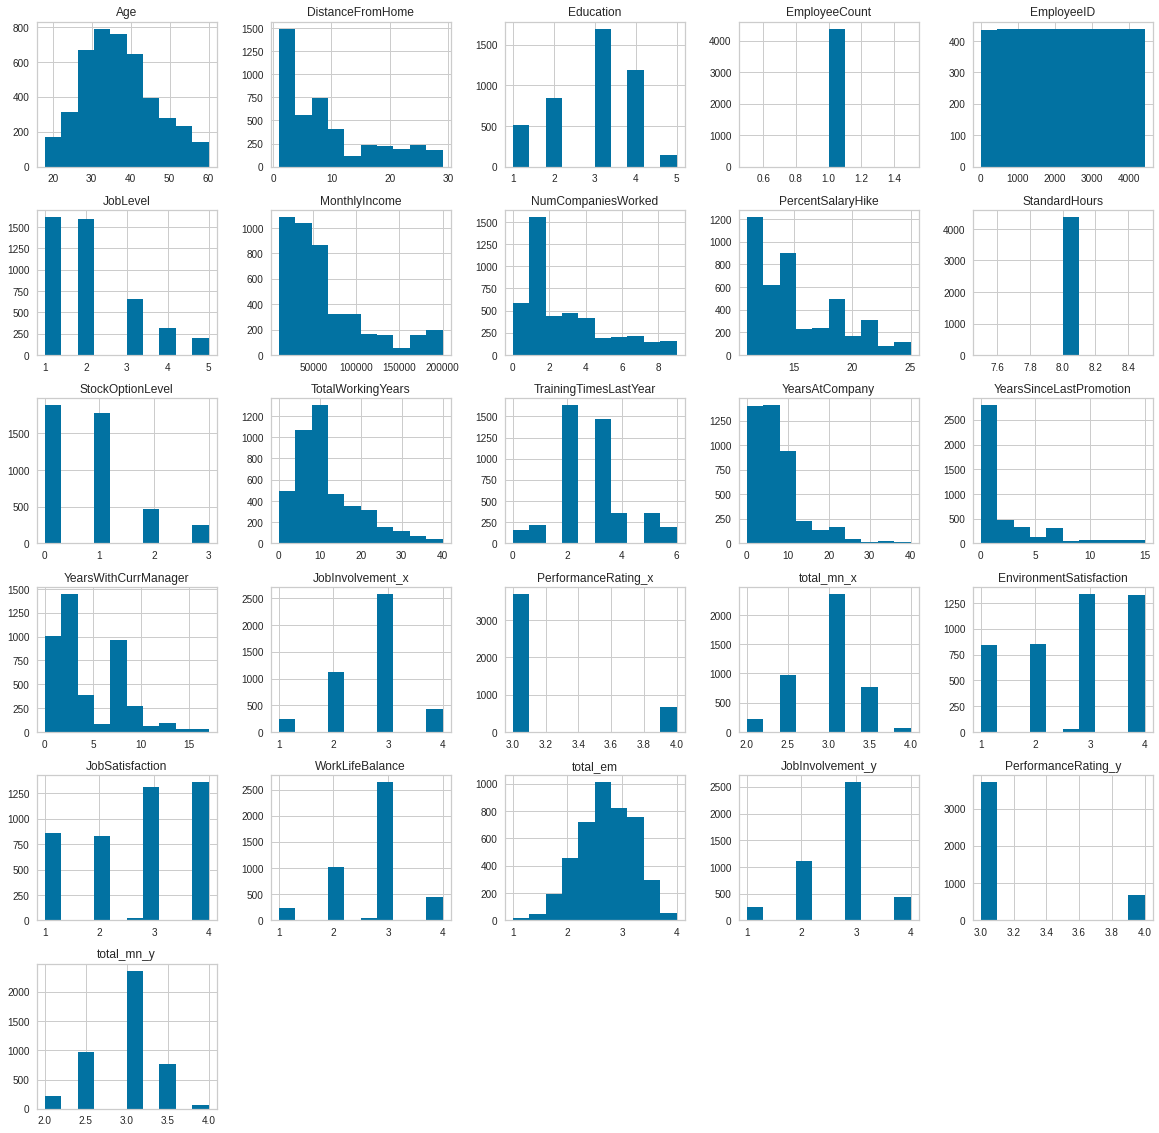

In [ ]:
df_EDA.hist(figsize=(20,20))
plt.show()

Let's take a look for correlations in the data. Be warned: It's quite a big heatmap.

In [ ]:
df_EDA.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'JobInvolvement_x', 'PerformanceRating_x', 'total_mn_x',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'total_em', 'JobInvolvement_y', 'PerformanceRating_y', 'total_mn_y'],
      dtype='object')

  command:

    streamlit run /usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py [ARGUMENTS]
2022-10-09 13:29:21.912 
  command:

    streamlit run /usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

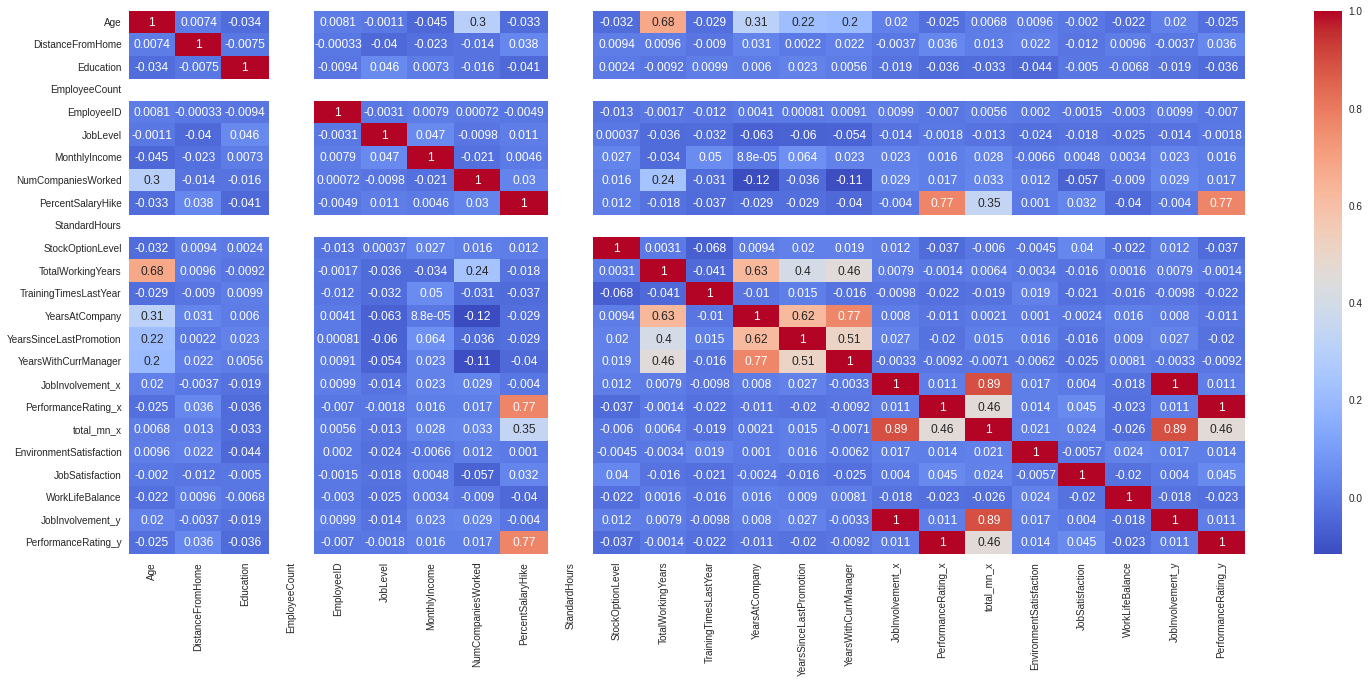

In [ ]:
corr = df_EDA.drop(['total_mn_y','total_em'],axis=1).corr()

plt.figure(figsize=(25,10))

sns.heatmap(corr,annot=True,cbar=True,cmap="coolwarm")

plt.xticks(rotation=90)

st.title ("Correlation between variables")

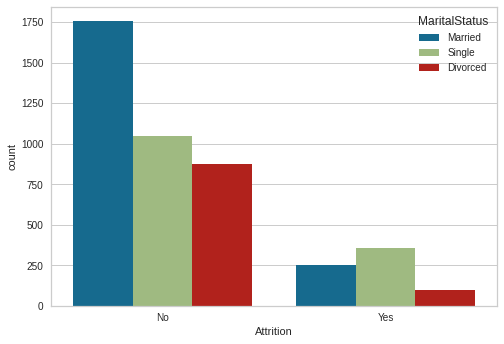

In [ ]:
sns.countplot(x='Attrition', hue= 'MaritalStatus', data = df_EDA)
plt.show()

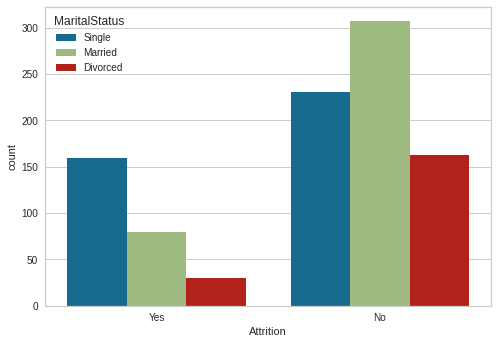

In [ ]:
sns.countplot(x='Attrition', hue= 'MaritalStatus', data = df_EDA_u30)
plt.show()

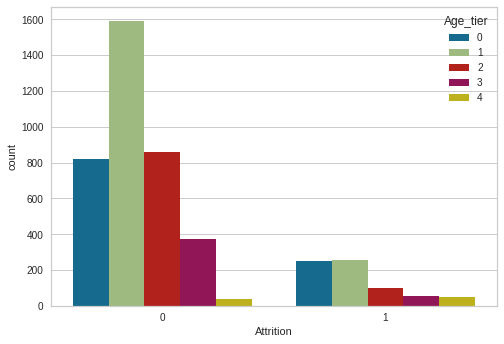

In [ ]:
sns.countplot(x='Attrition', hue= 'Age_tier', data = df_general)
plt.show()

It would seem that Age_tier 0 and 1 have a higher attrition risk. These 2 age tiers are under the age of 30, which is what we will be focusing our attention on.

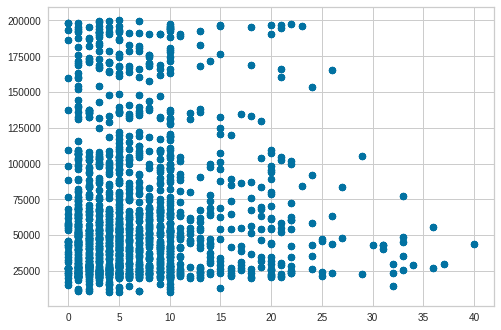

In [ ]:
plt.scatter(df_EDA["YearsAtCompany"], df_EDA["MonthlyIncome"])

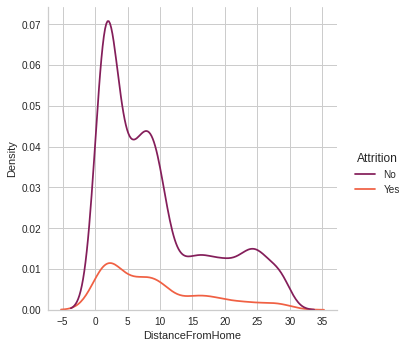

In [ ]:
sns.displot(data = df_EDA, x = 'DistanceFromHome', hue = 'Attrition', kind="kde",palette='rocket')

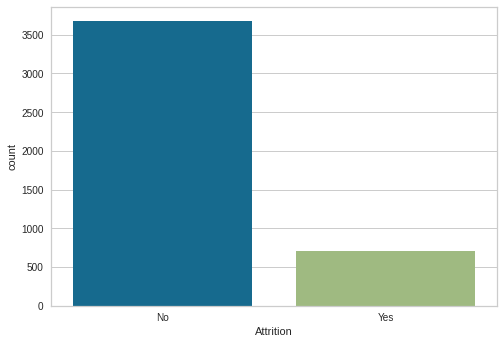

In [ ]:
sns.countplot(x='Attrition', data = df_EDA)
plt.show()

In [ ]:
avg_df_general=df_EDA.groupby("Attrition").mean()
avg_df_general

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,...,JobInvolvement_x,PerformanceRating_x,total_mn_x,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,total_em,JobInvolvement_y,PerformanceRating_y,total_mn_y
Attrition,,,,,,,,,,,,,,,,,,,,,
No,37.567038,9.232527,2.920044,1.0,2210.377482,2.069894,65684.209954,2.646451,15.157465,8.0,...,2.735654,3.150122,2.942888,2.771681,2.777492,2.780562,2.776578,2.735654,3.150122,2.942888
Yes,33.628369,9.024113,2.872340,1.0,2194.387234,2.032624,61814.950355,2.937589,15.487943,8.0,...,2.703546,3.174468,2.939007,2.471799,2.470537,2.659639,2.533991,2.703546,3.174468,2.939007


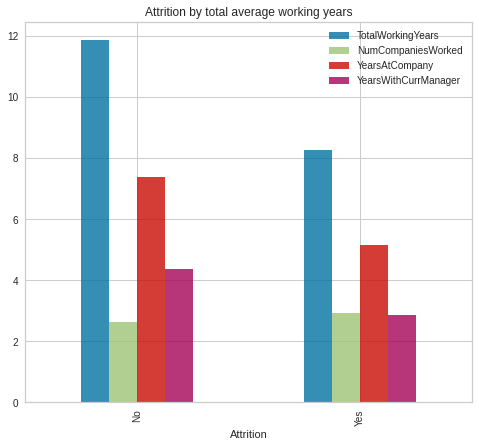

In [ ]:
# bar chart_for compare 
bar_fig = plt.figure(figsize=(8,7))

bar_ax = bar_fig.add_subplot(111)

sub_avg_df_general = avg_df_general[["TotalWorkingYears", "NumCompaniesWorked", "YearsAtCompany", "YearsWithCurrManager"]]

sub_avg_df_general.plot.bar(alpha=0.8, ax=bar_ax, title="Attrition by total average working years");

In [ ]:
df_EDA_u30.groupby('Attrition').mean()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,...,JobInvolvement_x,PerformanceRating_x,total_mn_x,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,total_em,JobInvolvement_y,PerformanceRating_y,total_mn_y
Attrition,,,,,,,,,,,,,,,,,,,,,
No,26.055635,8.958631,3.009986,1.0,2189.834522,2.057061,67710.570613,1.542083,15.522111,8.0,...,2.720399,3.191155,2.955777,2.754880,2.782004,2.750082,2.762322,2.720399,3.191155,2.955777
Yes,24.810409,9.089219,2.921933,1.0,2120.695167,2.137546,62624.721190,2.074349,15.620818,8.0,...,2.646840,3.156134,2.901487,2.535951,2.497131,2.694280,2.575787,2.646840,3.156134,2.901487


In [ ]:
df_EDA.groupby('Attrition').mean()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,...,JobInvolvement_x,PerformanceRating_x,total_mn_x,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,total_em,JobInvolvement_y,PerformanceRating_y,total_mn_y
Attrition,,,,,,,,,,,,,,,,,,,,,
No,37.567038,9.232527,2.920044,1.0,2210.377482,2.069894,65684.209954,2.646451,15.157465,8.0,...,2.735654,3.150122,2.942888,2.771681,2.777492,2.780562,2.776578,2.735654,3.150122,2.942888
Yes,33.628369,9.024113,2.872340,1.0,2194.387234,2.032624,61814.950355,2.937589,15.487943,8.0,...,2.703546,3.174468,2.939007,2.471799,2.470537,2.659639,2.533991,2.703546,3.174468,2.939007


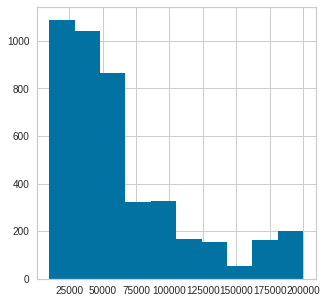

In [ ]:
df_EDA['MonthlyIncome'].hist(figsize=(5,5))